# Get Backtranslated Phrases and Visuilaize them via Redewiedergabe

In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

np.random.seed(3093453)
sns.set(context="talk", style="darkgrid")


cwd = os.getcwd()
folder = "clean+translated-data"
file = "clean-de.csv"
path = "/".join( (cwd, folder, file) )

df = pd.read_csv(path, index_col=0)
df["lang"] = "de"
df

,Textstelle,Metapher,Kandidat,Fokus,Rahmen,orig,lang
index,,,,,,,
0,Der politische Körper verwendet in beiden Fäll...,2,1,Zähnen und Krallen,der politische Körper,"""Der politische Körper verwendet in beiden Fä...",de
1,Immer noch wird durch die protestantische Lehr...,0,3,NaN,NaN,"""Immer noch wird durch die protestantische Le...",de
2,"Kein Zweifel, schreibt Alb. Schaeffle, vorauss...",0,3,NaN,NaN,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",de
3,Mit je weiterem Blick wir die Stoffwelt zu übe...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",de
4,Solange das Menschengeschlecht seinen Zerstöre...,0,3,NaN,NaN,"""Solange das Menschengeschlecht seinen Zerstö...",de
...,...,...,...,...,...,...,...
794,verlaufs sie hat Naturforschung in dem von uns...,0,3,NaN,NaN,verlaufs; sie hat Naturforschung in dem von un...,de
795,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse,wenn wir uns ein Prinzip denken und auf Grund ...,de
796,wenn wir von dem schlechten Worte Rechtsphilof...,2,1,schwindsüchtig ist,daß eine Philosophie,wenn wir von dem schlechten Worte »Rechtsphilo...,de


In [2]:
files = os.listdir(folder)
files = [file for file in files if re.match(r'clean-[a-z]{2}-de.csv', file)]
files

['clean-cs-de.csv', 'clean-pl-de.csv', 'clean-en-de.csv', 'clean-da-de.csv']

In [3]:
for file in files:
    path = "/".join( (cwd, folder, file) )
    data = pd.read_csv(path, index_col=0)
    data["lang"] = file[6:8]
    
    df = pd.concat([df, data])

df.reset_index(inplace=True)
df

,index,Textstelle,Metapher,Kandidat,Fokus,Rahmen,orig,lang
0,0,Der politische Körper verwendet in beiden Fäll...,2,1,Zähnen und Krallen,der politische Körper,"""Der politische Körper verwendet in beiden Fä...",de
1,1,Immer noch wird durch die protestantische Lehr...,0,3,NaN,NaN,"""Immer noch wird durch die protestantische Le...",de
2,2,"Kein Zweifel, schreibt Alb. Schaeffle, vorauss...",0,3,NaN,NaN,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",de
3,3,Mit je weiterem Blick wir die Stoffwelt zu übe...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",de
4,4,Solange das Menschengeschlecht seinen Zerstöre...,0,3,NaN,NaN,"""Solange das Menschengeschlecht seinen Zerstö...",de
...,...,...,...,...,...,...,...,...
3990,794,Sie hat durchweg Naturwissenschaft in dem von ...,0,3,NaN,NaN,verlaufs; sie hat Naturforschung in dem von un...,da
3991,795,Wenn wir uns ein Prinzip ausdenken und darauf ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse,wenn wir uns ein Prinzip denken und auf Grund ...,da
3992,796,sieht man von dem Schimpfwort Rechtsphilosophi...,2,1,schwindsüchtig ist,daß eine Philosophie,wenn wir von dem schlechten Worte »Rechtsphilo...,da
3993,797,"Die Macht der Regierung, die verschiedenen Mot...",0,2,NaN,NaN,"»Die Macht, die das Kabinett hat, auf die vers...",da


# Get the Gold standard subset

In [4]:
gold = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2-GoldStandard.csv", index_col = 0)
gold.drop(["Annotator", "Filename"], axis=1, inplace=True)
gold.drop_duplicates(inplace=True)
gold

,Textstelle,Metapher?,Fokus,Rahmen
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN
...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']"
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN


In [5]:
np.isin(df.orig, gold.Textstelle).mean().round(3)

0.819

In [6]:
658 - 806

-148

In [7]:
np.isin(gold.Textstelle, df.orig).mean()

0.9969512195121951

In [8]:
gold.Textstelle[~np.isin(gold.Textstelle, df.orig)]

567    [17]: Geschlecht von gestern, die Lebenden an ...
657    Die Organisation, wie das natürlich ist, geht ...
Name: Textstelle, dtype: object

# Get the Embeddings from Multilingual SBert

In [9]:
from sentence_transformers import SentenceTransformer

model_name = "distiluse-base-multilingual-cased-v2"

model = SentenceTransformer(model_name)

In [10]:
sentences = df.Textstelle

embeddings = model.encode(sentences)
embeddings.shape

(3995, 512)

# Dimensionality Reduction with UMAP or TSNE

In [11]:
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2)
#X = tsne.fit_transform(embeddings)
#X.shape

In [12]:
from umap import UMAP

reducer = UMAP()

X = reducer.fit_transform(embeddings)

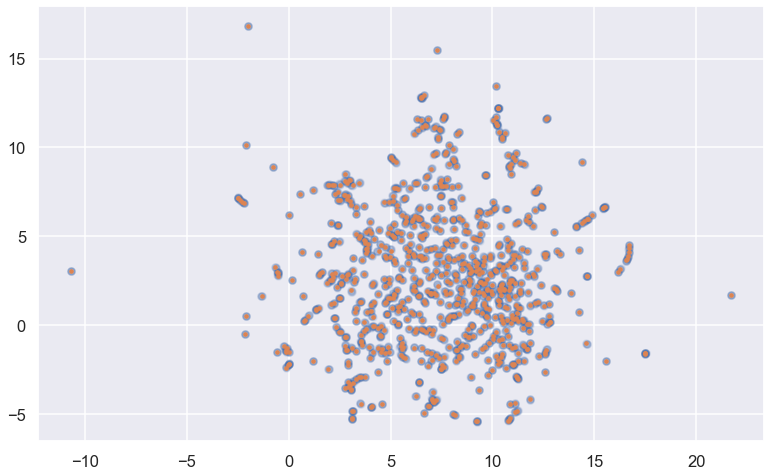

In [13]:
k = df["index"].max() +1

plt.figure(figsize=(13, 8))

plt.scatter(X[:,0], X[:,1], alpha=0.1, s=50)
plt.scatter(X[:k,0], X[:k,1], alpha=1, s = 10);

# Plot a nice example that highlights the effects of translations

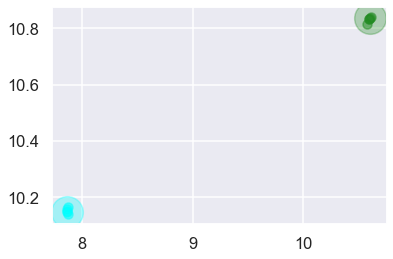

In [14]:
idx1 = 1
plt.scatter(X[idx1,0],      X[idx1,1], alpha=0.3, s = 1000, c="cyan")
plt.scatter(X[idx1::k,0], X[idx1::k,1], alpha=0.5, c="cyan")

idx2 = 25
plt.scatter(X[idx2,0],      X[idx2,1], alpha=0.3, s = 1000, c="forestgreen")
plt.scatter(X[idx2::k,0], X[idx2::k,1], alpha=0.5, c="forestgreen");

#idx3 = 40
#plt.scatter(X[idx3,0],      X[idx3,1], alpha=0.3, s = 1000, c="darkorange")
#plt.scatter(X[idx3::k,0], X[idx3::k,1], alpha=0.5, c="darkorange");

In [15]:
dist = np.zeros((k, k))
for i in range(k):
    dist[i, :] = np.sqrt(np.sum((X[:k,:][i] - X[:k,:]) ** 2, axis=1))

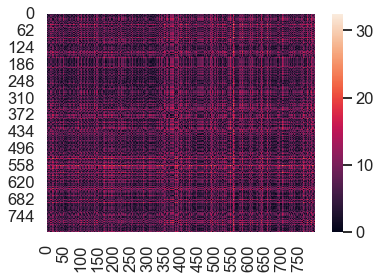

In [16]:
sns.heatmap(dist);
dist += np.eye(k, k)*100000

In [17]:
np.min(dist).round(4)

0.0022

In [18]:
idx = np.argsort(dist.reshape(-1,))[::2][21] #8, 11, 23 ist cool :D; 27 bisher am besten
idx1 = idx // k; print(idx1)
idx2 = idx % k; print(idx2)

print(df.loc[idx1, "Textstelle"])

213
166
Man kann auf diese Weise eine böse Anlage, z. B. die Neigung zur Grausamkeit, nie eigentlich ganz ertöten und aus der Psyche des Kindes ausmerzen sie bleibt stets darin, aber sie wird unschädlich, weil sich als Frucht guter Erziehung im Kinde jetzt bei jeder aufsteigenden Neigung zu einer grausamen Handlung durch Gedankenassoziation zugleich abmahnend ein ganzer Komplex von Vorstellungen erhebt, welche jenen Wunsch als schlecht, als verachtenswert, als von bösen Folgen begleitet erscheinen und ihn deshalb nicht zur Tat werden lassen.


In [19]:
df.loc[idx1, "Textstelle"]

'Man kann auf diese Weise eine böse Anlage, z. B. die Neigung zur Grausamkeit, nie eigentlich ganz ertöten und aus der Psyche des Kindes ausmerzen sie bleibt stets darin, aber sie wird unschädlich, weil sich als Frucht guter Erziehung im Kinde jetzt bei jeder aufsteigenden Neigung zu einer grausamen Handlung durch Gedankenassoziation zugleich abmahnend ein ganzer Komplex von Vorstellungen erhebt, welche jenen Wunsch als schlecht, als verachtenswert, als von bösen Folgen begleitet erscheinen und ihn deshalb nicht zur Tat werden lassen.'

In [20]:
df.loc[idx2, "Textstelle"]

'Es ist nicht immer nötig, daß dieser der schlechten Neigung entgegenstehende Vorstellungskomplex durch Erziehung und Erzieher bewußt hervorgebracht wird  das Kind saugt diese Vorstellungen, sobald es sich in einer dazu Anlaß gebenden Umgebung befindet, von selbst ein, es erzieht sich in einem guten Milieu durch Nachahmung und Gewöhnung gewissermaßen allein.'

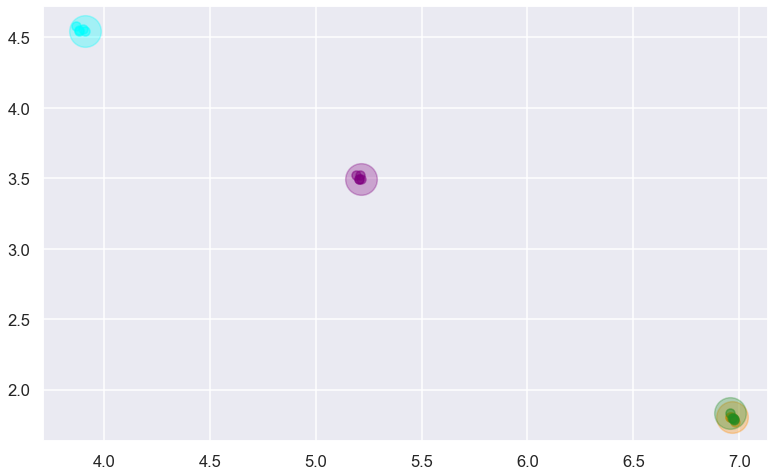

In [21]:
plt.figure(figsize = (13, 8))

plt.scatter(X[idx1,0],    X[idx1,1], alpha=0.3, s = 1000, c="darkorange")
plt.scatter(X[idx1::k,0], X[idx1::k,1], alpha=0.5, c="darkorange")

plt.scatter(X[idx2,0],    X[idx2,1], alpha=0.3, s = 1000, c="forestgreen")
plt.scatter(X[idx2::k,0], X[idx2::k,1], alpha=0.5, c="forestgreen");

idx3=41 # 3, 41, 77 
plt.scatter(X[idx3,0],    X[idx3,1], alpha=0.3, s = 1000, c="cyan")
plt.scatter(X[idx3::k,0], X[idx3::k,1], alpha=0.5, c="cyan");

idx3=77 # 3, 41, 77
plt.scatter(X[idx3,0],    X[idx3,1], alpha=0.3, s = 1000, c="purple")
plt.scatter(X[idx3::k,0], X[idx3::k,1], alpha=0.5, c="purple");


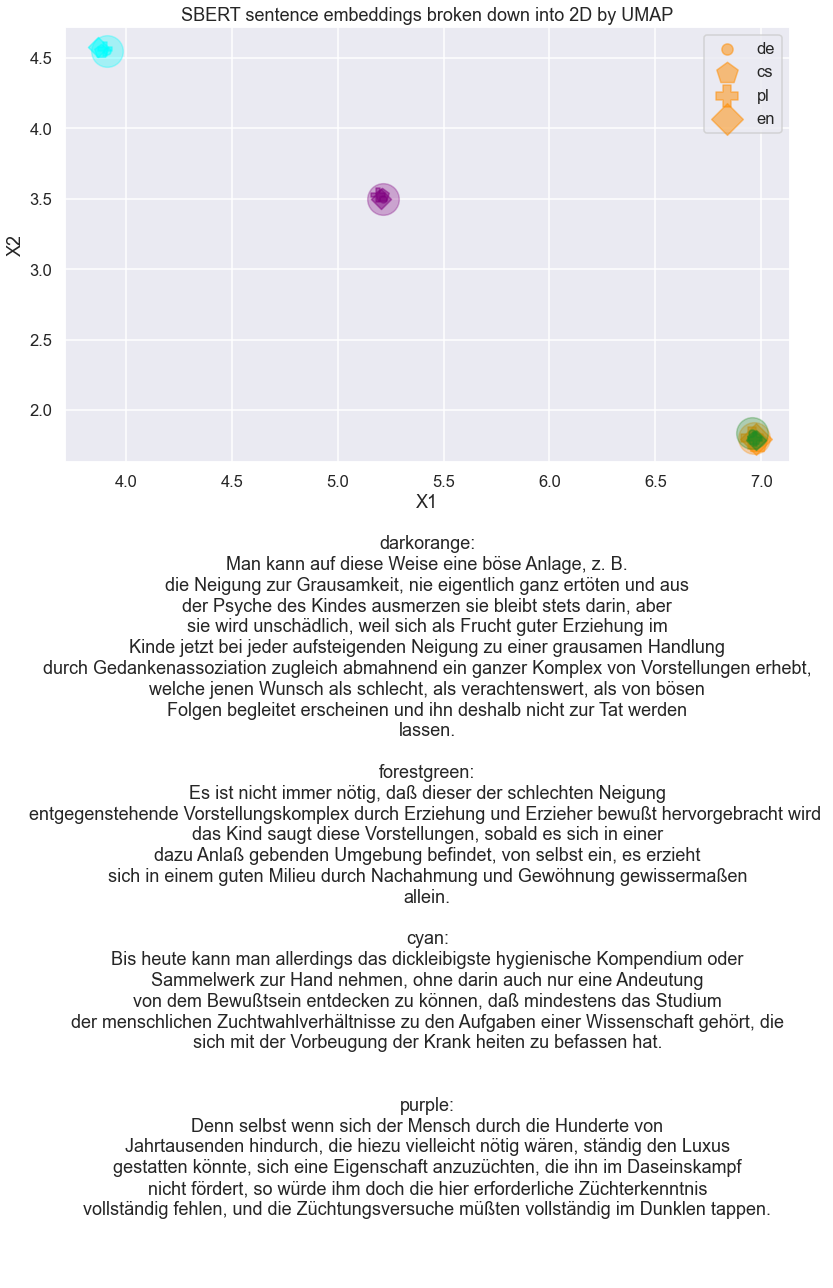

In [22]:
idx = [idx1, idx2, 41, 77]
cols = ["darkorange", "forestgreen", "cyan", "purple"]
markers = [".", "p", "P", "D", "s"]
langs = df.lang.unique().tolist()

title="X1\n\n"

plt.figure(figsize = (13, 8))

# all texts
for i in range(4):
    plt.scatter(X[idx[i],0],    X[idx[i],1], alpha=0.3, s = 1000, c=cols[i])
    #plt.scatter(X[idx[i]::k,0], X[idx[i]::k,1], alpha=0.5, c=cols[i])
    
    # languages
    for j in range(4):
        if i == 0:
            plt.scatter(X[idx[i]+k*j,0], X[idx[i]+k*j,1], s = 500,
                        marker=markers[j],alpha=0.5, c=cols[i],
                        label = langs[j])
        else:
            plt.scatter(X[idx[i]+k*j,0], X[idx[i]+k*j,1], s = 200,
                        marker=markers[j],alpha=0.5, c=cols[i])
    
    
    title += cols[i] + ':\n'
    # add textstellen to xlab
    text = df.loc[idx[i], "Textstelle"]
    h = 10
    text = text.split(" ")
    for j in range(len(text)//h +1):
        #title += text[j*h: (j+1)*h] + "\n"
        title += " ".join(text[j*h: (j+1)*h]) + '\n'
        
    title += '\n'
    

plt.xlabel(title);
plt.ylabel("X2")
plt.title("SBERT sentence embeddings broken down into 2D by UMAP")
plt.legend();